In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib.font_manager as fm

kaggle의 tripadvisor의 리뷰데이터이다. 리뷰를 이용하여 별 점수인 Rating을 맞출려고 한다

In [2]:
df = pd.read_csv('D:/data/tripadvisor_hotel_reviews.csv')

In [3]:
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [4]:
for i in df['Review']:
    i.strip()

strip은 공백을 제거를 해준다.

In [5]:
df['Review']

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object

In [6]:
for i in df['Review']:
    if i.isupper():
        print('here i am')
# 대문자 없음

In [7]:
df.duplicated().sum()  # 중복 없음

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [9]:
df['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

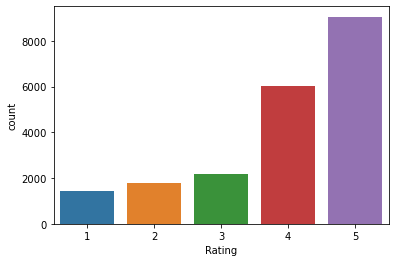

In [10]:
sns.countplot(x= df['Rating'])

In [11]:
print(len(df[df['Rating'] == 1]) / len(df['Rating'])*100)  #7%
print(len(df[df['Rating'] == 2]) / len(df['Rating'])*100)   # 9%
print(len(df[df['Rating'] == 3]) / len(df['Rating'])*100)  # 11
print(len(df[df['Rating'] == 4]) / len(df['Rating'])*100)  # 29
print(len(df[df['Rating'] == 5]) / len(df['Rating'])*100) # 44

6.934751842272218
8.75018300717388
10.658337806842027
29.47147528183105
44.185252061880824


In [12]:
df_len1 = df[df['Rating']==1]['Review'].str.len()

In [13]:
pos = [4,5]
nag = [1,2,3]

In [14]:
def motion(rating):
    if rating in pos:
        return 2
    elif rating == 3:
        return 1
    else: 
        return 0

In [15]:
df['motion'] = df['Rating'].apply(motion)

In [16]:
df['motion'].value_counts()

2    15093
0     3214
1     2184
Name: motion, dtype: int64

<AxesSubplot:xlabel='motion', ylabel='count'>

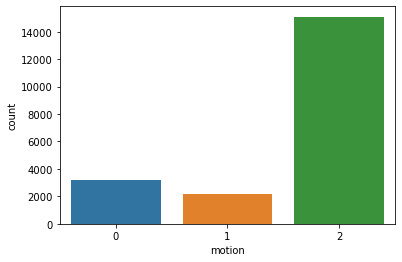

In [17]:
sns.countplot(x = df['motion'])

In [18]:
print(len(df[df['motion'] == 0]) / len(df['motion'])*100)  #15
print(len(df[df['motion'] == 1]) / len(df['motion'])*100)  # 10
print(len(df[df['motion'] == 2]) / len(df['motion'])*100)  # 75

15.684934849446098
10.658337806842027
73.65672734371186


In [19]:
import spacy

In [20]:
nlp = spacy.load('en_core_web_sm')

In [21]:
df['Review']

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object

In [22]:
def tokenize(en_text):
    return [tok.text for tok in nlp.tokenizer(en_text)]

In [23]:
def normalize(msg):
    doc = nlp(msg)
    res = []
    
    for token in doc:
        if(token.is_stop or token.is_punct or token.is_space):
            pass
        else:
            res.append(token.lemma_.lower())
    res_str = ' '.join(res)
    return res_str

In [24]:
import time 

In [25]:
df['Review1'] = df["Review"].apply(normalize)

In [26]:
df['Review1'] = df['Review1'].apply(str)

In [27]:
df['Review1'][0]

'nice hotel expensive parking get good deal stay hotel anniversary arrive late evening take advice previous review valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable wake stiff neck high pillow soundproof like hear music room night morning loud bang door open closing hear people talk hallway maybe noisy neighbor aveda bath product nice goldfish stay nice touch take advantage stay long location great walking distance shopping overall nice experience having pay 40 parking night'

# wordcloud

In [28]:
from wordcloud import WordCloud,STOPWORDS

In [29]:
stop_words = ['hotel']
text = [i for i in df['Review1']]
text_tok = ' '.join(text).split()

In [30]:
text_all = [i for i in text_tok if i not in stop_words]

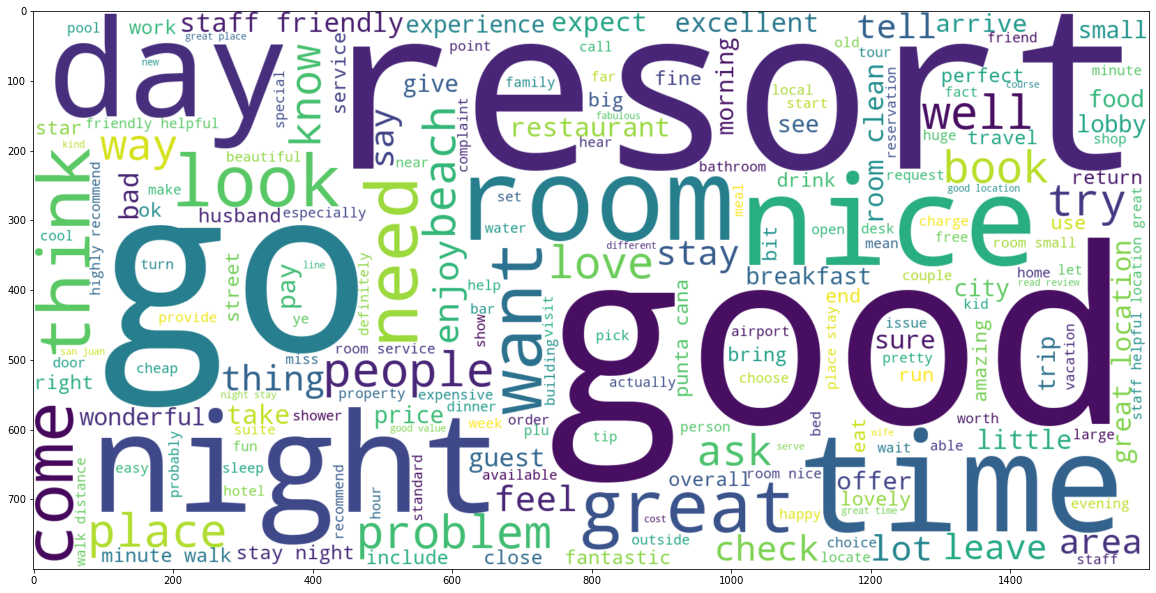

In [31]:
plt.figure(figsize=(20,20)) # 시각화 크기 설정
wc = WordCloud(max_words = 200, width = 1600,height = 800, background_color='white',
               stopwords = STOPWORDS).generate(' '.join(text_all))
plt.imshow(wc,interpolation='bilinear')

In [32]:
Counter(text_all).most_common(30)

[('room', 46654),
 ('stay', 27881),
 ('good', 21569),
 ('great', 21284),
 ('staff', 16381),
 ('night', 14071),
 ('day', 13027),
 ('nice', 12986),
 ('time', 12249),
 ('location', 11254),
 ('service', 10695),
 ('clean', 10631),
 ('restaurant', 10227),
 ('beach', 10158),
 ('place', 9707),
 ('breakfast', 9704),
 ('walk', 9681),
 ('like', 9358),
 ('food', 9305),
 ('resort', 8931),
 ('go', 8535),
 ('pool', 8387),
 ('bed', 7763),
 ('get', 7461),
 ('small', 7095),
 ('area', 7049),
 ('friendly', 6811),
 ('people', 6806),
 ('bar', 6799),
 ('want', 6631)]

In [33]:
df_0 = df[df['motion']==0]

text_0= [i for i in df_0['Review1']]
text_tok_0 = ' '.join(text_0).split()

stop_words = ['hotel']
text0 = [i for i in text_tok_0 if i not in stop_words]

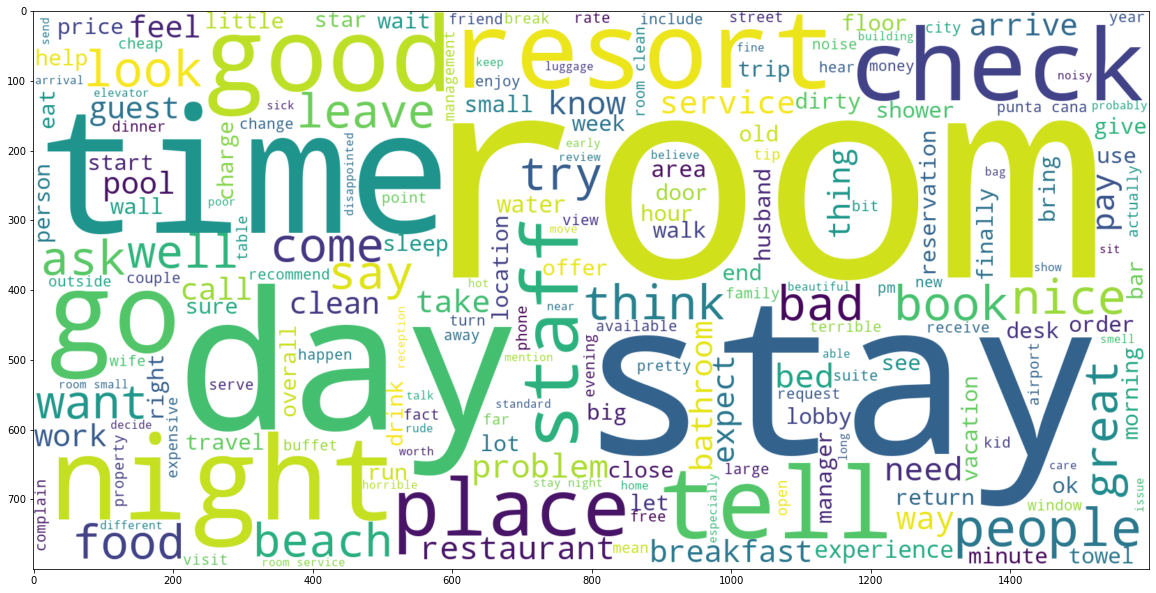

In [34]:
plt.figure(figsize=(20,20)) # 시각화 크기 설정
wc = WordCloud(max_words = 200, width = 1600,height = 800, background_color='white',
               stopwords = STOPWORDS).generate(' '.join(text0))
plt.imshow(wc,interpolation='bilinear')

In [35]:
Counter(text0).most_common(30)

[('room', 9852),
 ('stay', 4510),
 ('day', 2760),
 ('night', 2708),
 ('good', 2607),
 ('staff', 2283),
 ('service', 2201),
 ('time', 2198),
 ('go', 1909),
 ('like', 1835),
 ('resort', 1810),
 ('food', 1743),
 ('tell', 1742),
 ('check', 1624),
 ('place', 1624),
 ('get', 1611),
 ('bed', 1607),
 ('beach', 1582),
 ('bad', 1573),
 ('nice', 1518),
 ('people', 1391),
 ('desk', 1387),
 ('book', 1351),
 ('ask', 1317),
 ('restaurant', 1306),
 ('clean', 1284),
 ('pay', 1267),
 ('great', 1252),
 ('look', 1245),
 ('pool', 1226)]

In [36]:
df_1 = df[df['motion']==1]
text_1= [i for i in df_1['Review1']]
text_tok_1 = ' '.join(text_1).split()

stop_words = ['hotel','room']
text_1 = [i for i in text_tok_1 if i not in stop_words]

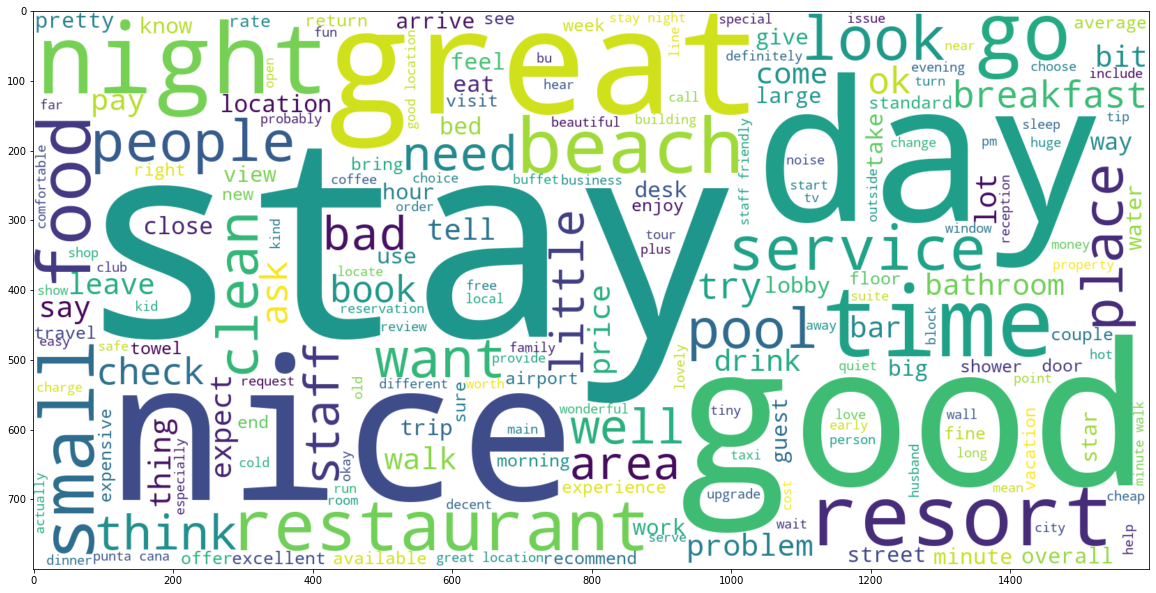

In [37]:
plt.figure(figsize=(20,20)) # 시각화 크기 설정
wc = WordCloud(max_words = 200, width = 1600,height = 800, background_color='white',
               stopwords = STOPWORDS).generate(' '.join(text_1))
plt.imshow(wc,interpolation='bilinear')

In [38]:
Counter(text_1).most_common(30)

[('good', 2845),
 ('stay', 2712),
 ('nice', 1823),
 ('great', 1775),
 ('night', 1744),
 ('day', 1500),
 ('staff', 1496),
 ('location', 1431),
 ('time', 1392),
 ('beach', 1337),
 ('clean', 1321),
 ('like', 1277),
 ('resort', 1218),
 ('food', 1196),
 ('service', 1189),
 ('restaurant', 1160),
 ('pool', 1123),
 ('place', 1076),
 ('walk', 1041),
 ('breakfast', 1040),
 ('small', 1036),
 ('get', 1020),
 ('go', 990),
 ('bed', 959),
 ('area', 947),
 ('people', 861),
 ('price', 846),
 ('bar', 818),
 ('look', 812),
 ('little', 801)]

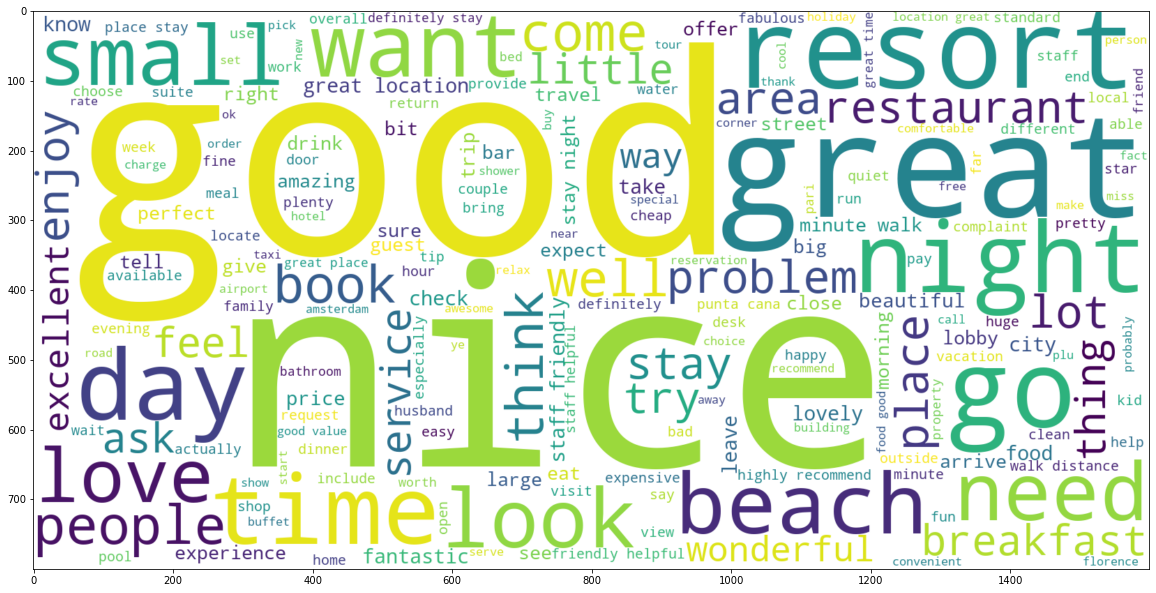

In [39]:
df_2 = df[df['motion']==2]
text_2= [i for i in df_2['Review1']]
text_tok_2 = ' '.join(text_2).split()

stop_words = ['hotel','room']
text_2 = [i for i in text_tok_2 if i not in stop_words]
plt.figure(figsize=(20,20)) # 시각화 크기 설정
wc = WordCloud(max_words = 200, width = 1600,height = 800, background_color='white',
               stopwords = STOPWORDS).generate(' '.join(text_2))
plt.imshow(wc,interpolation='bilinear')

In [40]:
Counter(text_2).most_common(30)

[('stay', 20659),
 ('great', 18257),
 ('good', 16117),
 ('staff', 12602),
 ('nice', 9645),
 ('night', 9619),
 ('location', 8879),
 ('day', 8767),
 ('time', 8659),
 ('clean', 8026),
 ('restaurant', 7761),
 ('walk', 7751),
 ('breakfast', 7591),
 ('service', 7305),
 ('beach', 7239),
 ('place', 7007),
 ('food', 6366),
 ('like', 6246),
 ('pool', 6038),
 ('resort', 5903),
 ('friendly', 5676),
 ('go', 5636),
 ('excellent', 5397),
 ('bed', 5197),
 ('area', 5178),
 ('bar', 5092),
 ('recommend', 5031),
 ('small', 4972),
 ('get', 4830),
 ('little', 4736)]

# H-Gram

In [41]:
from sklearn.feature_extraction.text import CountVectorizer 
import seaborn as sns

# H-Gram 설정 정의 함수

def get_top_text_ngram(corpus,n,g):
    vec = CountVectorizer(ngram_range=(g,g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x: x[1],reverse = True)
    return words_freq[:n]

<AxesSubplot:>

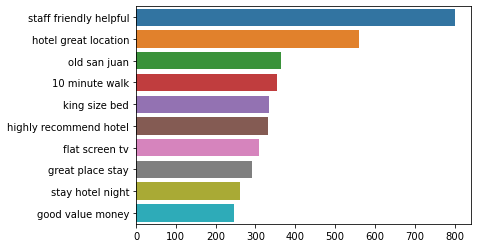

In [42]:
t_all = get_top_text_ngram(text,10,3)
t_all = dict(t_all)
sns.barplot(x = list(t_all.values()),y = list(t_all.keys()))

<AxesSubplot:>

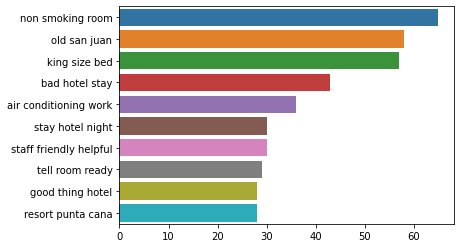

In [43]:
# motion = 0
t_0 = get_top_text_ngram(text_0,10,3)
t_0 = dict(t_0)
sns.barplot(x = list(t_0.values()),y = list(t_0.keys()))

<AxesSubplot:>

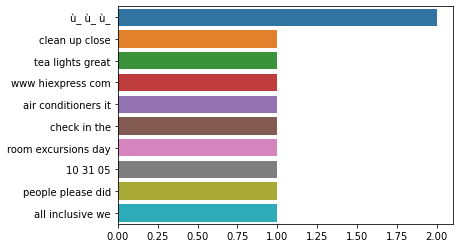

In [44]:
# motion  =1
t_1 = get_top_text_ngram(text_1,10,3)
t_1 = dict(t_1)
sns.barplot(x = list(t_1.values()),y = list(t_1.keys()))

# Topic화

In [45]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [46]:
count_vectorizer =  CountVectorizer(max_df = 0.1, max_features= 1000, min_df= 2, ngram_range= (1,2))
feat_vect = count_vectorizer.fit_transform(text_1)
print('CV:',feat_vect.shape)

CV: (224649, 1000)


In [47]:
lda = LatentDirichletAllocation(n_components= 5) # 5개 주제로 묶음
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=5)

In [48]:
def display_topics(model, feature_names, num_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]  # argsort : array sort
        top_indexes=topic_word_indexes[:num_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])


        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word를 10개만 추출
# print(display_topics(lda, feature_names, 10))
print(display_topics(lda, feature_names, 5))

Topic # 0
great day location beach like
Topic # 1
stay time resort service restaurant
Topic # 2
good bathroom check bad floor
Topic # 3
place breakfast go the price
Topic # 4
nice night staff clean pool
None


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
from numpy.core.fromnumeric import argmax
doc_topic = lda.transform(feat_vect)

doc_per_topic_list = []

for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    topic_pr = doc_topic[n].max()
    doc_per_topic_list.append([n,topic_most_pr,topic_pr])

doc_topic_df = pd.DataFrame(doc_per_topic_list,columns = ['Doc_Num','Topic','Percentage'])
doc_topic_df.head()

,Doc_Num,Topic,Percentage
0,0,4,0.600000
1,1,0,0.200000
2,2,4,0.600000
3,3,0,0.200000
4,4,3,0.599999


In [50]:
doc_topic.shape[0]

224649

In [51]:
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchtext.vocab import Vectors
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

# Word2vec

In [52]:
len(text)

20491

In [53]:
tex_tok  = df['Review1'].apply(tokenize)

In [54]:
tex_tok

0        [nice, hotel, expensive, parking, get, good, d...
1        [ok, special, charge, diamond, member, hilton,...
2        [nice, room, 4, experience, hotel, monaco, sea...
3        [unique, great, stay, wonderful, time, hotel, ...
4        [great, stay, great, stay, go, seahawk, game, ...
                               ...                        
20486    [well, keep, secret, 3rd, time, stay, charm, 5...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, look, nice, modern, outside, desk, staff,...
20489    [hotel, theft, ruin, vacation, hotel, open, se...
20490    [people, talk, believe, excellent, rating, hot...
Name: Review1, Length: 20491, dtype: object

In [55]:
model = Word2Vec(sentences=tex_tok, window=5, min_count=5, workers=4, sg=0)
model.wv.vectors.shape

(12858, 100)

In [56]:
model_result = model.wv.most_similar(["stay"])
print(model_result)

[('staying', 0.6835266351699829), ('pulitzer', 0.6223679184913635), ('october', 0.6188063621520996), ('intercontinental', 0.6158730387687683), ('stayed', 0.6155723333358765), ('recently', 0.6153697371482849), ('august', 0.6121218204498291), ('january', 0.6051700115203857), ('dumont', 0.6013999581336975), ('2005', 0.5999616384506226)]


#  Embedding

In [57]:
from torch.utils.data import IterableDataset

In [58]:
import torch.nn as nn
embedding_layer = nn.Embedding(num_embeddings=len(text), 
                               embedding_dim=3,
                               padding_idx=1)

In [59]:
embedding_layer

Embedding(20491, 3, padding_idx=1)

Embedding 

In [60]:
from gensim.models import KeyedVectors

In [61]:
model.wv.save_word2vec_format('eng_w2v')  # model에서 학습시킨 값을 저장 

In [62]:
word2vec_model = KeyedVectors.load_word2vec_format('eng_w2v') # model 에서 학습을 로드

In [63]:
print(word2vec_model['hotel']) #  단어 embedding  한거 확인

[ 0.9113202  -0.15558377 -0.5591505  -0.2323566   0.03809349 -0.5809321
  0.30442983  1.5886014   0.60698956  0.01452626  1.9923229   0.7251804
 -0.5818823   0.90663517  0.01847319  0.30797878  0.07632069  1.3822727
 -0.9886937   1.4929901   0.36071578  0.33744013  0.16587661  0.2976079
  0.851521   -1.0362005  -0.18983567  0.96038824 -0.38392976 -0.08547299
 -0.60298514 -0.83376366 -0.88208604 -1.2699233   0.48887512 -0.6005585
  0.74669516 -0.15819019  0.10111644  0.6007987  -0.0507026   0.21955389
 -1.3154173  -0.5815574  -0.05966747  0.17160848  0.61283535  0.7857159
  0.75570405 -0.14461327  0.24679656  0.13978449 -0.52554053  0.1880337
  1.6553402  -0.8712873   0.80811805 -1.0125227  -0.51933765  1.0048221
 -0.02858381  0.7665604  -0.3431267  -1.1126882  -0.07795453  0.17582445
  1.2322834   1.4428777   0.02427763  2.098671    1.8527398  -0.5246776
 -1.1927748   0.1037051  -0.46245435  1.3771068   0.12055264  0.85577637
 -1.0331978  -1.5877013  -2.170831    1.6405157   0.15829057

In [64]:
vectors = Vectors(name="eng_w2v")

## word2vec을 weight 값으로 적용

In [65]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer

In [66]:
tokenizer = Tokenizer(num_words=50000, oov_token='<OOV>')
VOCAB_SIZE = len(tokenizer.index_word) + 1
EMBEDDING_DIM = 100
MAX_LENGTH = 1887
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))


In [67]:
# tokenizer에 있는 단어 사전을 순회하면서 word2vec의 100차원 vector를 가져옵니다
for word, idx in tokenizer.word_index.items():
    embedding_vector = word2vec_model[word] if word in word2vec_model else None
    if embedding_vector is not None:
        embedding_matrix[idx] = embedding_vector
        
embedding_matrix.shape

(1, 100)

In [68]:
df['motion']

0        2
1        0
2        1
3        2
4        2
        ..
20486    2
20487    2
20488    0
20489    0
20490    0
Name: motion, Length: 20491, dtype: int64

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df['Review1'], df['motion'] ,test_size=0.2)

model =  tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(VOCAB_SIZE, 
                    EMBEDDING_DIM, 
                    input_length=INPUT_LENGTH, 
                    weights=[embedding_matrix], # weight는 바로 위의 
embedding_matrix 대입
                    trainable=False # embedding layer에 대한 train은 꼭 false로 지정
                   )
         )
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, recurrent_dropout=0.1)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [70]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train.values.ravel())
X_train=vectorizer.transform(X_train.values.ravel())
X_test=vectorizer.transform(X_test.values.ravel())
X_train=X_train.toarray()
X_test=X_test.toarray()

In [71]:
X

NameError: name 'X' is not defined

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer

tokenizer = Tokenizer(num_words=50000, oov_token='<OOV>')

tokenizer.fit_on_texts(X_train)
#print(tokenizer.word_index)
total_word = len(tokenizer.word_index)
print('Total distinct words: {}'.format(total_word))




train_seq = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_seq,maxlen = MAX_LENGTH) # 최대값을 설정해줘야한다.

test_seq = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_seq,maxlen = MAX_LENGTH)

#One hot encoding the label 원핫코딩을 왜 하는거지?
lb = LabelBinarizer()
train_labels = lb.fit_transform(y_train)
test_labels = lb.transform(y_test)

In [ ]:
from tensorflow.keras.utils import to_categorical

to_catergorical 이랑 labelbinarizer 이랑 one-hotcoding의 차이점은?

In [ ]:
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

# 신경망

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.regularizers import l1, l2

In [ ]:
nn.rstm

In [74]:
model = tf.keras.models.Sequential([tf.keras.layers.Embedding(VOCAB_SIZE, 
                    EMBEDDING_DIM, 
                    input_length=MAX_LENGTH, 
                    weights=[embedding_matrix], # weight는 바로 위의 embedding_matrix 대입
                    trainable=False # embedding layer에 대한 train은 꼭 false로 지정
                  ),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
                                    tf.keras.layers.Dropout(0.5),
                                    
                                    tf.keras.layers.Dense(64, kernel_regularizer=l2(0.001),
                                                          bias_regularizer=l2(0.001), activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(3, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1887, 100)         100       
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                        

In [79]:
model = tf.keras.models.Sequential([tf.keras.layers.Embedding(total_word, 8),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(8, kernel_regularizer=l2(0.001),
                                                          bias_regularizer=l2(0.001), activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(3, activation='softmax')])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 8)           333560    
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               3200      
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                      

In [83]:
with tf.device('/device:GPU:0')

SyntaxError: invalid syntax (Temp/ipykernel_12400/2529110748.py, line 1)

In [80]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy : 원핫 코딩을 했을때 , sparse_categorical_crossentropy: 정수일때 
model.fit(train_padded, train_labels, epochs=25, validation_data=(test_padded, test_labels))

Epoch 1/25
223/513 [============>.................] - ETA: 2:37 - loss: 1.0282 - accuracy: 0.7204

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_2/embedding_2/embedding_lookup' defined at (most recent call last):
    File "C:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\kio02\AppData\Local\Temp/ipykernel_12400/1035323091.py", line 3, in <module>
      model.fit(train_padded, train_labels, epochs=25, validation_data=(test_padded, test_labels))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\layers\core\embedding.py", line 199, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_2/embedding_2/embedding_lookup'
indices[19,1872] = 41695 is not in [0, 41695)
	 [[{{node sequential_2/embedding_2/embedding_lookup}}]] [Op:__inference_train_function_24602]

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics[['accuracy', 'val_accuracy']].plot()
metrics[['loss', 'val_loss']].plot()

In [ ]:
pred2 = model.predict(test_padded)

In [ ]:
true_labels = np.argmax(test_labels, axis=-1)
pred_labels = np.argmax(pred2, axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(true_labels, pred_labels))
print(classification_report(true_labels, pred_labels))
# 1의 값이 적어서 학습이 잘 안되는것 같음